# Ejercicio 3

In [65]:
# Este archivo utiliza una librería llamada "powerlaw", con métodos para fitear
# power-law y otras funciones a los datos, usando loglikelihood y el test de
# Kolmogorov-Smirnov para obtener el k mínimo.
#
# Para instalar la librería usando pip:
#                               pip install powerlaw
#
# Más información en https://github.com/jeffalstott/powerlaw.
#
# Referencia:
# Jeff Alstott, Ed Bullmore, Dietmar Plenz. (2014). powerlaw: a Python package 
# for analysis of heavy-tailed distributions. PLoS ONE 9(1): e85777

import networkx as nx
from urllib.request import urlopen
import numpy as np
import matplotlib.pylab as plt
import powerlaw as pl
from os import listdir

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 12]

In [66]:
# Carga de datos
if "as-22july06.gml" not in listdir('Datos/'):
    red_auto = nx.read_gml(urlopen("https://raw.githubusercontent.com/MarianoNicolini17/TP1/master/Datos/as-22july06.gml"))
else:
    red_auto = nx.read_gml("Datos/as-22july06.gml")

In [67]:
# Lista con los grados de la red.
grados = np.array(list(dict(red_auto.degree).values()))

#### Funciones de ploteo

In [68]:
# Diferentes maneras de visualizar el histograma de la distribución de
# grado de la red.

def plot_pdf_grados():
    # Tamaño de la red.
    N = len(grados)
    
    plt.subplots_adjust(wspace = 0.5)

    # Distribución de grado en escala lin-lin, bineado lineal.
    plt.subplot(221)
    linlinc, bin_edges = np.histogram (grados,100)
    linlinb = (bin_edges[:-1] + bin_edges[1:])/2. # Punto en el centro del bin.
    plt.plot(linlinb,linlinc/N,'b.')
    plt.title('a) Escala lineal-lineal')
    plt.xlabel('Grado')
    plt.ylabel('Probabilidad del grado ($P_k$)')
    plt.legend()
    plt.grid(True)

    # Distribución de grado en escala log-lin, bineado lineal.
    plt.subplot(222)
    loglinc, bin_edges = np.histogram (grados,300)
    loglinb = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.plot(loglinb,loglinc/N,'b.')
    plt.xscale("log")
    plt.title("b) Escala log (eje x)-lineal (eje y)")
    plt.xlabel('Grado')
    plt.ylabel('Probabilidad del grado ($P_k$)')
    plt.legend()
    plt.grid(True)

    # Distribución de grado en escala log-log, bineado lineal.
    plt.subplot(223)
    plt.title("c) Escala log-log")
    plt.xlabel('Grado')
    plt.ylabel('Probabilidad del grado ($P_k$)')
    pl.plot_pdf(grados, linear_bins=True, color='b', marker=".", linestyle='None')
    plt.grid(True)

    # Distribución de grado en escala log-log, bineado logarítmico.
    plt.subplot(224)
    plt.title("d) Escala log-log con binning logarítmico")
    plt.xlabel('Grado')
    plt.ylabel('Probabilidad del grado ($P_k$)')
    pl.plot_pdf(grados, color='b', marker=".", linestyle='None')
    plt.grid(True)

    plt.suptitle('Distribución de grado de la red')
    
    return

In [89]:
def plot_cdf_grados():
    
    plt.subplots_adjust(wspace = 0.5)
    
    # CDF del grado en escala log-log.
    plt.subplot(121)
    plt.title("CDF de la red (log-log)")
    plt.xlabel('Grado')
    plt.ylabel('Probabilidad del grado ($P_k$)')
    plt.grid(True)
    pl.plot_cdf(grados, color='b', marker=".", linestyle='None')

    # CCDF del grado en escala log-log.
    plt.subplot(122)
    plt.title("CCDF de la red (log-log)")
    plt.xlabel('Grado')
    plt.ylabel('Probabilidad del grado ($P_k$)')
    plt.grid(True)
    pl.plot_ccdf(grados, color='b', marker=".", linestyle='None')
    
    plt.suptitle('Función de distribución acumulada del grado de la red')

In [93]:
# - fit es un objeto que guarda toda la información de los datos y el fiteo
#   apenas se lo crea con pl.Fit(data,...). De hecho, se puede acceder a (en
#   principio) cualquier fiteo que se quiera. Para acceder al de power law
#   (y todos los parámetros del ajuste) se usa fit.power_law.
#
# - La opción discrete=True es necesaria porque los datos de grado toman sólo
#   valores discretos.

def ajuste_power_law():
    np.seterr(divide='ignore',invalid='ignore')

    fit = pl.Fit(grados,discrete=True,verbose=False)
    plt.figure(figsize=(7,7))
    fig = fit.plot_pdf(color='b', linestyle='None', marker='o', label='$P_k(k)$')
    fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig, label='Ajuste de power-law')
    plt.title("Distribución de grado de la red en escala log-log")
    plt.xlabel('Grado')
    plt.ylabel('Probabilidad del grado ($P_k$)')
    plt.grid(True)
    plt.legend()
    fig.figure

    print ("El valor del exponente según la aproximación es de", \
           round(fit.power_law.alpha,3))
    print ("El k mínimo obtenido para la mínima distancia de", \
           "Kolmogorov-Smirnov:", fit.power_law.xmin)
    print ("La mínima distancia de Kolmogorov-Smirnov es:", round(fit.power_law.D,3))

## Ítem A

Primero, vamos a presentar cuatro alternativas para exponer los datos de distribución de grado, $P_k$, en función del grado, $k$, de la red de sistemas autónomos de internet (as-22july06).

No handles with labels found to put in legend.
No handles with labels found to put in legend.


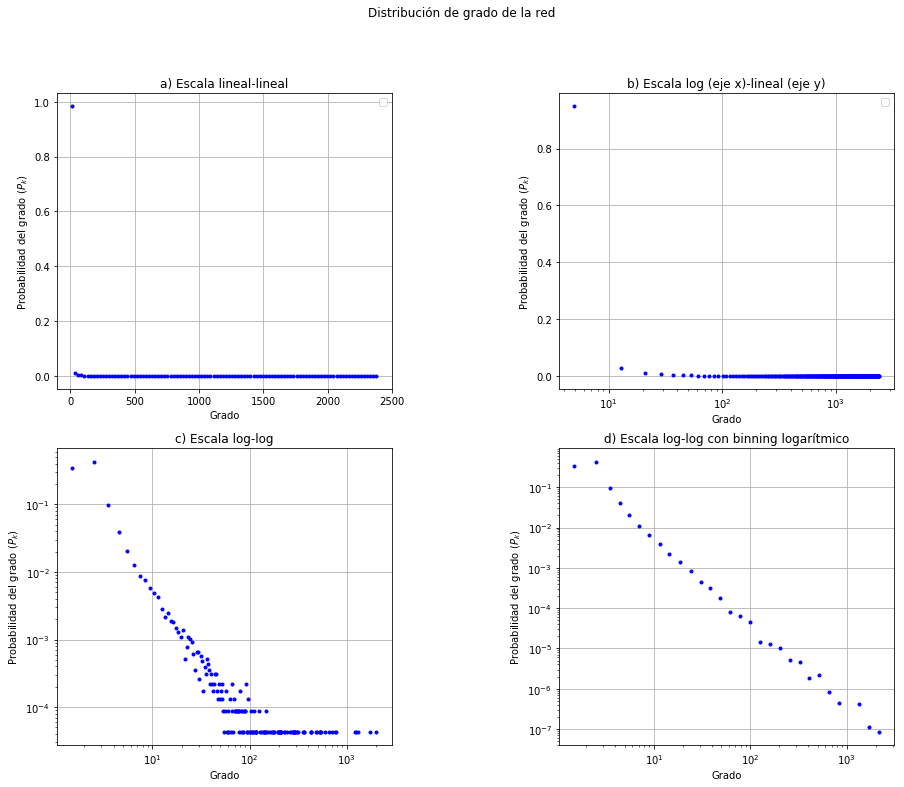

In [70]:
plot_pdf_grados()

En vez de representarse las distribuciones con un histograma se utilizaron puntos, lo cual no significa (desde ya) que cada punto represente un único nodo de la red. Cada uno representa un intervalo de grados, y la altura es la proporción de nodos de ese intervalo (bin) de grados en la cantidad total de nodos. En particular, la coordenada $x$ de cada nodo es el centro del intervalo, y los intervalos son siempre contiguos.

La escala del gráfico a) es lineal para ambos ejes. Hay dos problemas con esta representación:
 * La curva de la caída es demasiado abrupta y no puede distinguirse.
 * La cola de la curva es muy baja en comparación al primer dato, y no puede apreciarse en detalle.

Para resolver el primer problema, podemos llevar el eje x (de grados) a escala logarítmica. Esto es lo que se ve en el gráfico b). Sin embargo, todavía hay un problema de escala en el eje y; es decir, nos queda resolver el segundo problema. Para esto es que graficamos el eje y en escala logarítmica en c). Ya puede verse bien la caída y también se distingue la cola de la distribución, que ya tiene la pinta de ser libre de escala, pero ahora hay un problema de "resolución". O sea, los nodos de grado cada vez más alto pueden tener probabilidad mínima (es decir, tener una sola ocurrencia en la red), y eso se da en intervalos grandes de grados; a esto se corresponde el "achatamiento" de la curva hacia grados más elevados. Para resolver este último problema, pueden tomarse intervalos (bins) más grandes a medida que se avanza en el eje de grados. Una manera de lograr esto es haciendo un binning logarítmico. Esto se ve en el gráfico d), y podemos reconocer una recta decreciente, que corresponde a una ley de potencias.

El gráfico d) deja en evidencia que la red de sistemas autónomos de internet es libre de escala. 

Otra manera de visualizar los datos es usando la función de distribución acumulada, y la función de supervivencia:

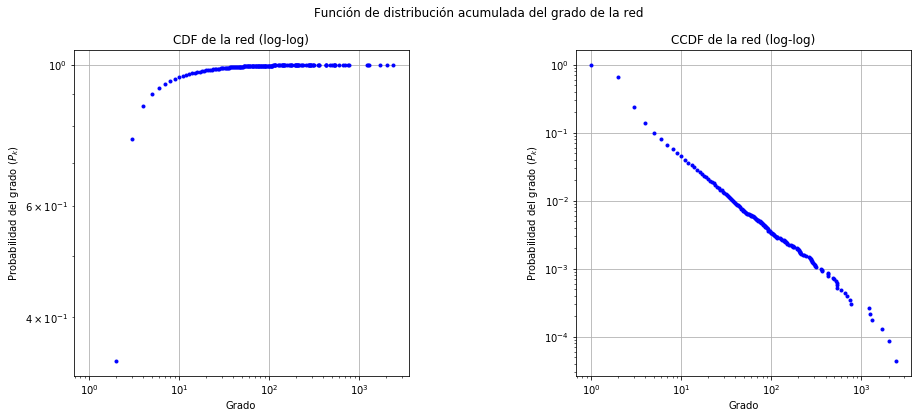

In [91]:
plt.rcParams['figure.figsize'] = [15, 6]
plot_cdf_grados()

## Ítem B

Una manera de caracterizar a las distribuciones de cola ancha (libres de escala) es ajustando una función de ley de potencias. El exponente $\gamma$ que se obtiene indica que tan marcado es este efecto, y un $2<\gamma<3$ indica un carácter libre de escala prominente.

Usamos la librería "powerlaw" para hacer el ajuste, que no sólo mueve el parámetro del exponente $\gamma$, también el $k_{mín}$. El primer parámetro se obtiene a partir de un ajuste por MLE (Maxmimum Likelihood Estimation), mientras que el segundo a partir de un test de minimización de Kolmogorov-Smirnov.

El valor del exponente según la aproximación es de 2.08
El k mínimo obtenido para la mínima distancia de Kolmogorov-Smirnov: 5.0
La mínima distancia de Kolmogorov-Smirnov es: 0.011


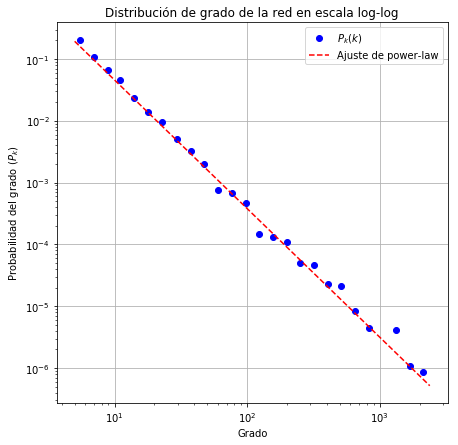

In [94]:
ajuste_power_law()